In [2]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV

In [7]:
from sklearn.metrics import mean_squared_error, classification_report, precision_recall_curve
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, RocCurveDisplay

In [8]:
import warnings
warnings.filterwarnings("ignore")

https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset

In [15]:
df = pd.read_csv('breast-cancer.csv')

In [17]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Text(0.5, 0, 'Class')

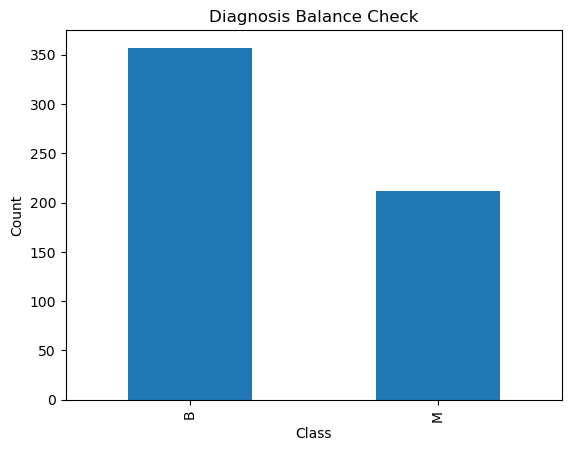

In [19]:
#We don't have a heavily unbalance dataset. It's unbalanced but ok.
#We should be ok without trying to oversample the dataset
df.diagnosis.value_counts().plot(kind='bar')
plt.title('Diagnosis Balance Check')
plt.ylabel('Count')
plt.xlabel('Class')

In [21]:
bc_df = df.drop(columns={'id'})

In [23]:
#sns.pairplot(bc_df, hue='diagnosis')

In [25]:
def label_encode(temp_df):
    le = LabelEncoder()
    temp_df['diagnosis_encoded'] = le.fit_transform(temp_df.diagnosis)
    return temp_df

In [27]:
encoded_df = bc_df.copy()

In [29]:
encoded_df = label_encode(encoded_df)
encoded_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_encoded
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [31]:
print(encoded_df.diagnosis_encoded.value_counts())
print(bc_df.diagnosis.value_counts())
print(encoded_df.isna().sum())

diagnosis_encoded
0    357
1    212
Name: count, dtype: int64
diagnosis
B    357
M    212
Name: count, dtype: int64
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimens

- Linear scaling: A popular normalization method for numerical data 
- Z-score scaling: A popular normalization method for numerical data that uses the mean and standard deviation to normalize data 
- Log scaling: A popular normalization method for numerical data 
- Min-max normalization: A normalization technique 
- Normalization by decimal scaling: A normalization technique
- If scaler is used before train_test_split, data leakage will happen. Do use scaler after train_test_split

In [34]:
X = encoded_df.drop(columns={'diagnosis_encoded', 'diagnosis'})
y = encoded_df['diagnosis_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [36]:
#https://www.youtube.com/watch?v=T9ETsSD1I0w&t=606s
pipe = Pipeline([
    ('scale', StandardScaler()),
    ('lgr', LogisticRegression())
])

In [38]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()), ('lgr', LogisticRegression())])

In [40]:
pipe.score(X_train, y_train)

0.9859154929577465

In [42]:
pipe.score(X_test, y_test)

0.9790209790209791

In [44]:
pipe.named_steps.lgr.coef_

array([[ 0.39751679,  0.41535774,  0.34832129,  0.45142016,  0.20791905,
        -0.62039231,  0.73558933,  1.09376305, -0.23601875, -0.08357971,
         1.28501592, -0.22136641,  0.58858571,  0.89527827,  0.19689721,
        -0.63403697,  0.14135554,  0.40058728, -0.5262862 , -0.73327971,
         0.84378886,  1.29571675,  0.51790962,  0.82723207,  0.53895662,
        -0.12288567,  1.00748469,  0.76642547,  1.21963558,  0.14580732]])

In [46]:
params = [{'penalty':['none','elasticnet', 'l1', 'l2']},
          {'C':[0.01, 0.01, 0.1, 1, 10, 100]}]
grid_search_lgr = GridSearchCV(estimator = LogisticRegression(),  
                           param_grid = params,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search_lgr.fit(X_train, y_train)

print(grid_search_lgr.best_estimator_)

average_fit_time_log_reg = grid_search_lgr.cv_results_['mean_fit_time'][grid_search_lgr.best_index_]
train_score_log_reg = grid_search_lgr.score(X_train, y_train)
test_score_log_reg = grid_search_lgr.score(X_test, y_test)

LogisticRegression(C=10)


In [48]:
pipe = Pipeline([
    ('scale', StandardScaler()),
    ('lgr', LogisticRegression(C=10))
])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()), ('lgr', LogisticRegression(C=10))])

In [50]:
params = {'n_neighbors': list(range(1, 31))}

grid_knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=params)
grid_knn.fit(X_train, y_train)

print(grid_knn.best_estimator_)

average_fit_time_knn = grid_knn.cv_results_['mean_fit_time'][grid_knn.best_index_]
train_score_knn = grid_knn.score(X_train, y_train)
test_score_knn = grid_knn.score(X_test, y_test)

KNeighborsClassifier(n_neighbors=7)


In [52]:
params = { 'criterion':['gini','entropy'],
          'max_depth': np.arange(3, 15)}

grid_tree = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params)
grid_tree.fit(X_train, y_train)
grid_score = grid_tree.score(X_train, y_train)

print(grid_tree.best_estimator_)

average_fit_time_dt = grid_tree.cv_results_['mean_fit_time'][grid_tree.best_index_]
train_score_dt = grid_tree.score(X_train, y_train)
test_score_dt = grid_tree.score(X_test, y_test)

DecisionTreeClassifier(criterion='entropy', max_depth=9)


In [54]:
params = {'kernel': ['rbf', 'linear', 'sigmoid'],
         'gamma': [0.1, 1.0, 10.0, 100.0]}

grid_svc = GridSearchCV(estimator=SVC(),param_grid=params)
grid_svc.fit(X_train, y_train)
grid_score = grid_svc.score(X_train, y_train)

print(grid_svc.best_estimator_)

average_fit_time_svc = grid_svc.cv_results_['mean_fit_time'][grid_svc.best_index_]
train_score_svc = grid_svc.score(X_train, y_train)
test_score_svc = grid_svc.score(X_test, y_test)

SVC(gamma=0.1, kernel='linear')


In [56]:
comparison_df = pd.DataFrame(columns=['model', 'train score', 'test score', 'average fit time'])

comparison_df = pd.concat([comparison_df, pd.DataFrame([{
    'model': 'KNN',
    'train score': train_score_knn,
    'test score': test_score_knn,
    'average fit time': average_fit_time_knn
}])], ignore_index=True)

comparison_df = pd.concat([comparison_df, pd.DataFrame([{
    'model': 'Logistic Regression',
    'train score': train_score_log_reg,
    'test score': test_score_log_reg,
    'average fit time': average_fit_time_log_reg
}])], ignore_index=True)

comparison_df = pd.concat([comparison_df, pd.DataFrame([{
    'model': 'Decision Tree',
    'train score': train_score_dt,
    'test score': test_score_dt,
    'average fit time': average_fit_time_dt
}])], ignore_index=True)

comparison_df = pd.concat([comparison_df, pd.DataFrame([{
    'model': 'SVC',
    'train score': train_score_svc,
    'test score': test_score_svc,
    'average fit time': average_fit_time_svc
}])], ignore_index=True)

comparison_df.set_index('model', inplace=True)
comparison_df

,train score,test score,average fit time
model,,,
KNN,0.936620,0.958042,0.000512
Logistic Regression,0.955399,0.958042,0.006363
Decision Tree,1.000000,0.958042,0.003176
SVC,0.969484,0.958042,0.735848


<Figure size 1000x500 with 0 Axes>

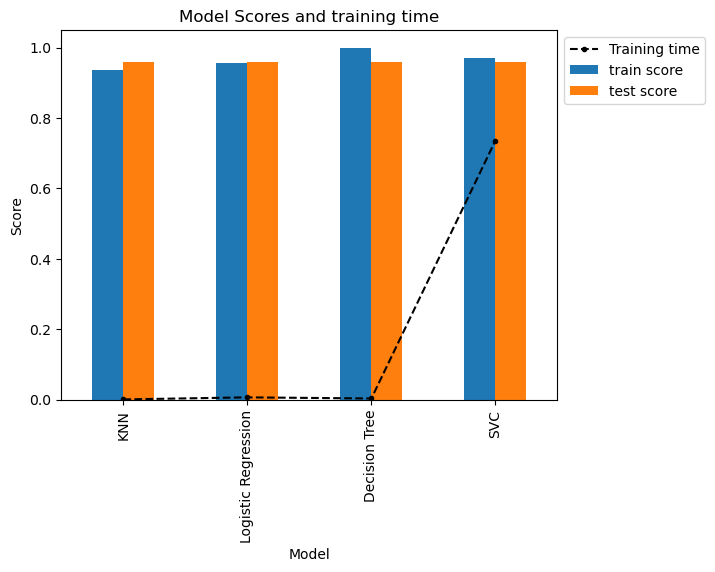

In [58]:
plt.figure(figsize=(10,5))
comparison_df[['train score','test score']].plot(kind='bar')
plt.plot(comparison_df['average fit time'],'k.--',label='Training time')
plt.ylabel('Score')
plt.xlabel('Model')
plt.title('Model Scores and training time')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

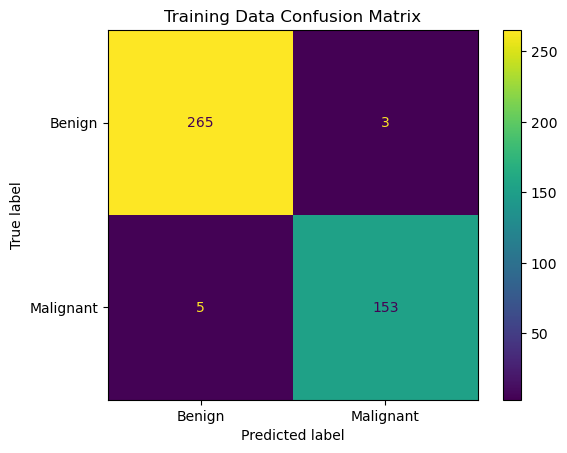

[(0, 268), (1, 158)]


In [60]:
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3).fit(X_train, y_train)

tree_preds = decision_tree.predict(X_train)
tree_confusion_mat = confusion_matrix(y_train, tree_preds)
tree_dist = ConfusionMatrixDisplay(confusion_matrix = tree_confusion_mat, display_labels = ['Benign', 'Malignant'])
tree_dist.plot()
plt.title('Training Data Confusion Matrix')
plt.show()
print(sorted(Counter(y_train).items()))

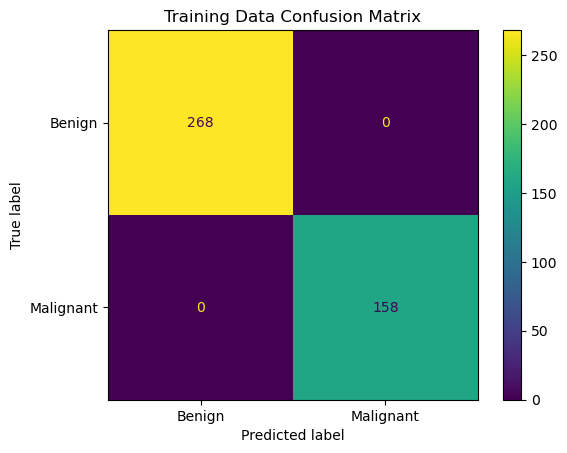

[(0, 268), (1, 158)]


In [62]:
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=7).fit(X_train, y_train)

tree_preds = decision_tree.predict(X_train)
tree_confusion_mat = confusion_matrix(y_train, tree_preds)
tree_dist = ConfusionMatrixDisplay(confusion_matrix = tree_confusion_mat, display_labels = ['Benign', 'Malignant'])
tree_dist.plot()
plt.title('Training Data Confusion Matrix')
plt.show()
print(sorted(Counter(y_train).items()))

In [64]:
pipe_tree = Pipeline([
    ('scale', StandardScaler()),
    ('lgr', DecisionTreeClassifier(criterion='entropy', max_depth=7))
])
pipe_tree.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('lgr',
                 DecisionTreeClassifier(criterion='entropy', max_depth=7))])

In [66]:
pipe_tree.score(X_train, y_train)

1.0

In [68]:
precision, recall, thresholds = precision_recall_curve(y_train, tree_preds, pos_label=1)

precision_recall_data = pd.DataFrame({'threshold': thresholds, 
                                      'precision': precision[1:], 
                                      'recall': recall[1:]})
precision_recall_data.head()

,threshold,precision,recall
0,0,1.0,1.0
1,1,1.0,0.0


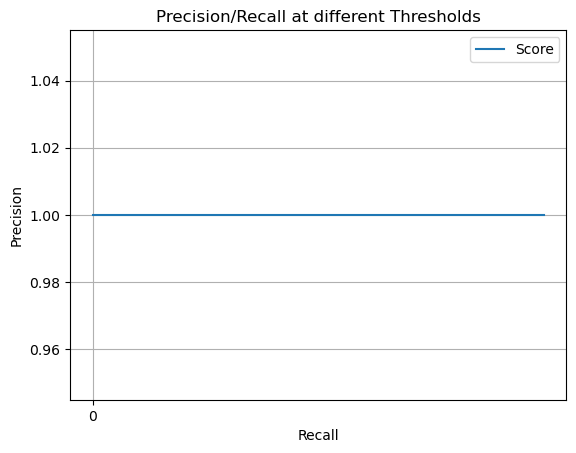

In [70]:
plt.plot(precision_recall_data.recall, precision_recall_data.precision, label = 'Score')
plt.title('Precision/Recall at different Thresholds')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xticks(thresholds[::5]) #take the thresholds list then display every other 5th point as the xtick
plt.grid()
plt.legend(bbox_to_anchor=(1, 1))

### As part of analysis we're checking the confusion matric for KNN and LR

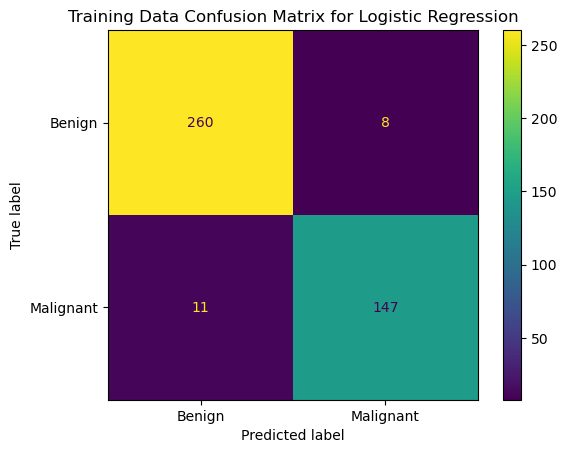

[(0, 268), (1, 158)]


In [73]:
##Logistic Regression

lr_tree = LogisticRegression(C=10).fit(X_train, y_train)

lr_preds = lr_tree.predict(X_train)
lr_confusion_mat = confusion_matrix(y_train, lr_preds)
lr_dist = ConfusionMatrixDisplay(confusion_matrix = lr_confusion_mat, display_labels = ['Benign', 'Malignant'])
lr_dist.plot()
plt.title('Training Data Confusion Matrix for Logistic Regression')
plt.show()
print(sorted(Counter(y_train).items()))

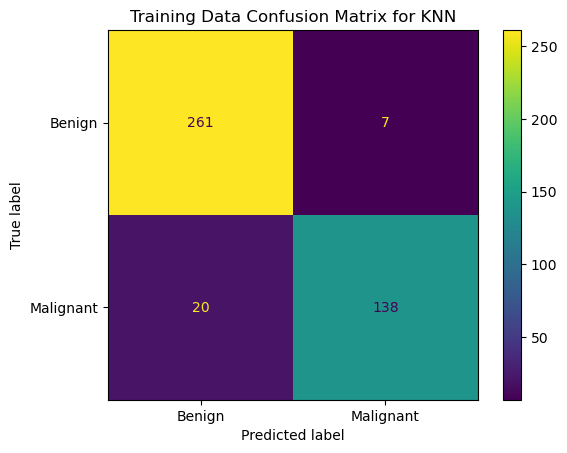

[(0, 268), (1, 158)]


In [75]:
##KNN

knn_tree = KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train)

knn_preds = knn_tree.predict(X_train)
knn_confusion_mat = confusion_matrix(y_train, knn_preds)
knn_dist = ConfusionMatrixDisplay(confusion_matrix = knn_confusion_mat, display_labels = ['Benign', 'Malignant'])
knn_dist.plot()
plt.title('Training Data Confusion Matrix for KNN')
plt.show()
print(sorted(Counter(y_train).items()))